In [1]:
import functions as func
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

<Figure size 360x288 with 0 Axes>

In [2]:
register_matplotlib_converters()
data = pd.read_csv('../data/pd_speech_features.csv', skiprows=[0])
data = data.drop(['id'], axis=1)
data.shape

(756, 754)

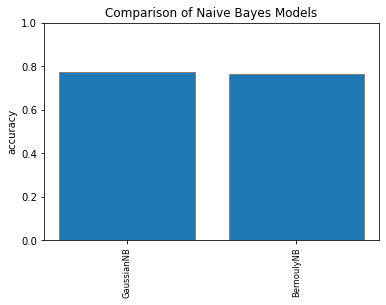

In [3]:
estimators = {'GaussianNB': GaussianNB(),  
              'BernoulyNB': BernoulliNB()}
tts = func.split_dataset(data)
xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(tts[0], tts[1])
    vprdY = estimators[clf].predict(tts[2])
    yvalues.append(metrics.accuracy_score(tts[3], vprdY))


plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Comparison of Naive Bayes Models', '', 'accuracy', percentage=True)
plt.show()


tr:  1 	 acc:  0.7533039647577092 	 recall:  0.9467455621301775 	 precision 0.7729468599033816
tr:  0.9 	 acc:  0.7929515418502202 	 recall:  0.9763313609467456 	 precision 0.7932692307692307
tr:  0.8 	 acc:  0.7709251101321586 	 recall:  0.9467455621301775 	 precision 0.7881773399014779


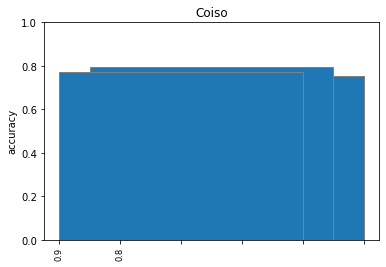

In [4]:
#thresholds = [1,0.9,0.8, 0.75, 0.7, 0.65, 0.6]
thresholds = [1,0.9,0.8]


xvalues = []
yvalues = []
for tr in thresholds:
    clf = BernoulliNB()
    corr_data = func.red_correlations(data, tr=tr)
    tts = func.split_dataset(corr_data)
    xvalues.append(tr)
    clf.fit(tts[0], tts[1])
    prdY = clf.predict(tts[2])
    print("tr: ",tr,"\t acc: ",metrics.accuracy_score(tts[3], prdY), 
          "\t recall: ", metrics.recall_score(tts[3], prdY),
         "\t precision", metrics.precision_score(tts[3], prdY))
    yvalues.append(metrics.accuracy_score(tts[3], prdY))


plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Coiso', '', 'accuracy', percentage=True)
plt.show()

## vamos com 0.75 de threshold

In [5]:
corr_data = func.red_correlations(data, tr=0.75)
corr_data.shape

(756, 568)

In [6]:
data_norm = func.normalize(corr_data, ['class','gender'])
data_norm.head()

,DFA,Ed2_2_coef,Ed2_3_coef,Ed2_4_coef,Ed2_6_coef,Ed2_7_coef,Ed2_8_coef,Ed_1_coef,Ed_2_coef,Ed_3_coef,...,tqwt_stdValue_dec_28Std,tqwt_stdValue_dec_34Mean,tqwt_stdValue_dec_34Median,tqwt_stdValue_dec_34Std,tqwt_stdValue_dec_36,tqwt_stdValue_dec_5Mean,tqwt_stdValue_dec_5Median,tqwt_stdValue_dec_5Std,class,gender
0,1.289731e-09,6.931142e-17,5.835806e-16,1.625047e-15,1.025306e-15,3.106444e-15,2.064977e-15,2.747318e-16,1.590930e-15,1.334155e-14,...,8.974378e-10,-2.193545e-13,4.867242e-12,1.820202e-11,5.325487e-12,6.668441e-13,7.115194e-13,1.381076e-11,1,1
1,1.309912e-09,1.016166e-16,1.018051e-15,2.563981e-15,3.016449e-15,4.468115e-16,6.146014e-15,3.167271e-16,2.318895e-15,2.337748e-14,...,8.103744e-10,3.319187e-12,6.302304e-12,3.446178e-11,9.011075e-12,-1.610365e-12,8.561247e-13,6.925308e-11,1,1
2,1.314402e-09,8.029823e-17,8.807529e-16,2.838630e-15,2.935843e-15,1.415426e-16,1.162672e-16,2.274792e-16,1.837332e-15,2.022038e-14,...,5.811930e-10,1.561596e-12,6.145634e-12,3.203689e-11,5.046345e-12,-5.950740e-13,4.716208e-13,1.243671e-11,1,1
3,2.065572e-09,1.518457e-12,1.909213e-12,3.178522e-12,6.666340e-12,1.000171e-11,1.743754e-11,2.215528e-11,5.337116e-11,6.597896e-11,...,1.557698e-09,-2.226002e-12,9.957380e-11,4.053467e-10,2.532188e-10,9.202883e-12,6.513636e-12,1.552703e-10,1,0
4,1.656068e-09,8.052630e-13,1.030854e-12,4.002859e-12,4.150237e-12,8.515312e-12,9.092576e-12,1.631761e-11,2.332718e-11,3.023109e-11,...,9.467725e-10,1.227261e-11,8.309606e-11,4.388951e-10,2.206928e-10,1.154569e-12,5.243529e-12,5.913289e-11,1,0


<Figure size 432x288 with 0 Axes>

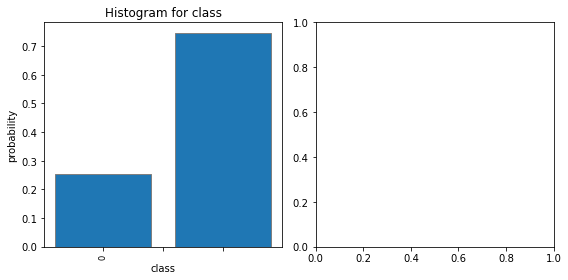

In [7]:
columns = ['class']
rows, cols = func.choose_grid(len(columns))
cols=2
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data_norm[columns[n]].dropna().value_counts(normalize=True)
    func.bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

## Unbalanced dataset
## Undersample está fora de questão

In [8]:
data_smote =func.smote_split(data_norm, 'class')
print(data_smote[0].shape, data_smote[1].shape, data_smote[2].shape, data_smote[3].shape)

(790, 567) (790, 1) (227, 567) (227, 1)


In [9]:
target_count = corr_data['class'].value_counts()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = corr_data[corr_data['class'] == min_class]
df_class_max = corr_data[corr_data['class'] != min_class] 

data_over = df_class_min.sample(len(df_class_max), replace=True)

data_over = df_class_max.append(data_over)
data_over.shape

(1128, 568)

In [10]:
def over_split(unba,  to_clf='class'):
    columns = unba.columns
    data = unba.copy()
    
    y1: np.ndarray = data['class'].values 
    X1: np.ndarray = data.drop('class', axis=1).values
    labels1 = pd.unique(y1)
    trnX1, tstX1, trnY1, tstY1 = train_test_split(X1, y1, train_size=0.7, stratify=y1)
    trnY1 = trnY1.reshape((-1, 1))
    tstY1 = tstY1.reshape((-1, 1))
    train = np.append(trnX1, trnY1, axis=1)
    
    data = pd.DataFrame(train,columns=columns)
    print(data.shape)
    ###########################################

    ###################################
    target_count = data[to_clf].value_counts()
    min_class = target_count.idxmin()
    ind_min_class = target_count.index.get_loc(min_class)

    values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

    df_class_min = data[data[to_clf] == min_class]
    df_class_max = data[data[to_clf] != min_class] 
    
    df_over = df_class_min.sample(len(df_class_max), replace=True)
    df_over = df_class_max.append(df_over)
    data = df_over
    
    y1: np.ndarray = data['class'].values 
    X1: np.ndarray = data.drop('class', axis=1).values
    y1 = y1.reshape((-1, 1))

    
    return (X1, y1, tstX1, tstY1, labels1)

data_over = over_split(corr_data, 'class')
print(data_over[0].shape, data_over[1].shape, data_over[2].shape, data_over[3].shape)

(529, 568)
(1056, 567) (1056, 1) (227, 567) (227, 1)


/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/andre/anaconda3/envs/cd-master/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


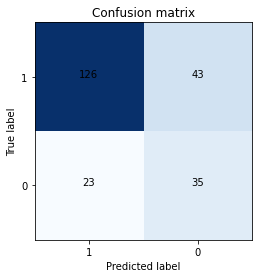

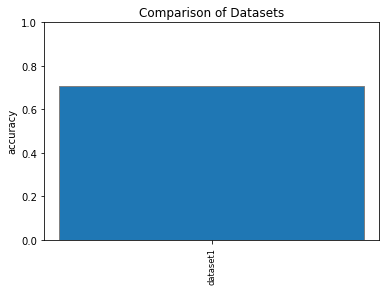

In [11]:
clf = BernoulliNB()
#d = func.split_dataset(data_smote)
# (trnX, trnY, tstX, tstY, labels)
d=data_smote

xvalues = ["dataset1"]
yvalues = []
cnf_mtx = []
clf.fit(d[0], d[1])
prdY = clf.predict(d[2])
yvalues.append(metrics.accuracy_score(d[3], prdY))
cnf_mtx.append(metrics.confusion_matrix(d[3], prdY, d[4]))

plt.figure()
func.plot_confusion_matrix(plt.gca(), cnf_mtx[0], d[4])
plt.show()

plt.figure()
func.bar_chart(plt.gca(), xvalues, yvalues, 'Comparison of Datasets', '', 'accuracy', percentage=True)
plt.show()

### Canto superior esquerdo representa falsos negativos, ou seja, tem a doença mas o classificafor diz que não. Visto que este é o cenário mais grave vamos dar mais importância a este valor e optar pelo Oversampling.


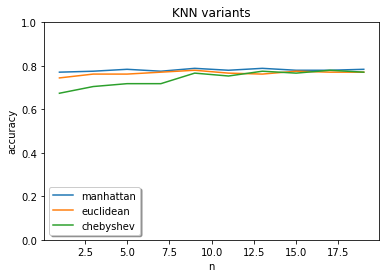

In [12]:
nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
dist = ['manhattan', 'euclidean', 'chebyshev']
values = {}
tts = func.split_dataset(data_norm)

for d in dist:
    yvalues = []
    for n in nvalues:
        knn = KNeighborsClassifier(n_neighbors=n, metric=d)
        knn.fit(tts[0], tts[1])
        prdY = knn.predict(tts[2])
        yvalues.append(metrics.accuracy_score(tts[3], prdY))
    values[d] = yvalues

plt.figure()
func.multiple_line_chart(plt.gca(), nvalues, values, 'KNN variants', 'n', 'accuracy', percentage=True)
plt.show()

## Testar com k-fold

In [13]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=13)
yvalues=[]
X = data_norm[data_norm.columns.difference(['class'])].values
y = data_norm['class'].values

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf.fit(X_train, y_train)
    prdY = clf.predict(X_test)
    yvalues.append(metrics.accuracy_score(y_test, prdY))

print(yvalues)





[0.8135593220338984, 0.7457627118644068, 0.8448275862068966, 0.7931034482758621, 0.8103448275862069, 0.896551724137931, 0.8793103448275862, 0.7241379310344828, 0.8620689655172413, 0.7068965517241379, 0.6896551724137931, 0.8275862068965517, 0.7413793103448276]
